In [28]:
from circuit_functions import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
import numpy as np
from numpy import pi
from time import sleep

## Plays a note from each column of the circuit

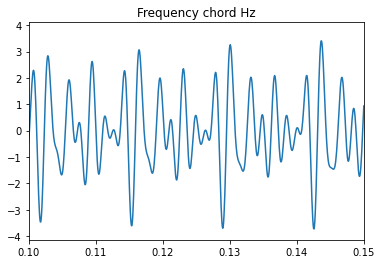

In [29]:
# Play notes at the same time
# A chord should sound not bad
d_maj_chord = [
    ('D4', 293.66),
    ('F#4', 369.99),
    ('A4', 440.00),
    ('D5', 587.33),
]
play_notes(d_maj_chord, merge=True, plot=True, volume=1)

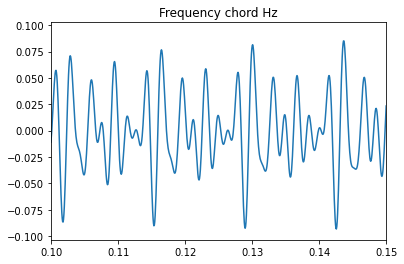

In [7]:
d_maj_chord = [
    ('D4', 293.66),
    ('F#4', 369.99),
    ('A4', 440.00),
    ('D5', 587.33),
]
# Volume doesn't do anything...
play_notes(d_maj_chord, merge=True, plot=True, volume=0.025)

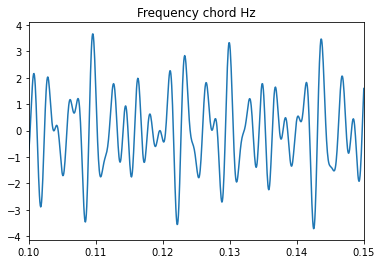

In [8]:
d_min_chord = [
    ('D4', 293.66),
    ('F4', 349.23),
    ('A4', 440.00),
    ('D5', 587.33),
]
play_notes(d_min_chord, merge=True, plot=True)

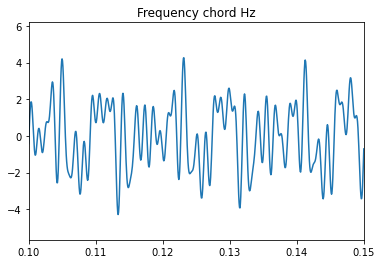

In [9]:
# 😍 🤣
a_maj_chord = [
    ('A2', 110.00),
    ('E2', 164.81),
    ('A4', 440.00),
    ('C#4', 554.37),
    ('E5', 659.25),
    ('A5', 880.00)
]
play_notes(a_maj_chord, merge=True, plot=True, volume=1)

In [10]:
# Play notes sequentially
sample_tune = [
    ('A5', 880.00),
    ('A5', 880.00),
    ('A5', 880.00),
    ('F#5', 739.99),
    ('D6', 1174.66),
]
play_notes(sample_tune, merge=False)

In [11]:
# Test get_note()
phases_c_scale = [
    (0, 'C4'),
    (pi/4, 'D4'),
    (pi/2, 'E4'),
    (-pi/4, 'C5'),
    (-pi/2, 'B4')
]
for (phase, note_name) in phases_c_scale:
    note = get_note(phase)
    print(f'Got {note[0]}, expected {note_name}')
    print('Correct? ', note[0] == note_name)

NameError: name 'pi' is not defined

In [22]:
"""Insert circuit in this cell"""

qasm = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[3];
creg c[3];

h q[0];
h q[1];
s q[0];
s q[1];
t q[0];
s q[1];
tdg q[0];
cx q[1],q[2];
t q[0];
s q[1];
h q[1];
cx q[0],q[1];
t q[0];
h q[1];
t q[0];
"""

circuit = QuantumCircuit.from_qasm_str(qasm)
circuit.draw()
print(f'{len(circuit.qubits)} qubits')

3 qubits


In [23]:
# Get circuits by column
sub_circuits = get_circuits_by_column(circuit)

In [24]:
# Use first column as the starting state vector
state_vector = get_state_vector(sub_circuits[0])
print_vector(state_vector)

sub_circuits[0].draw()
print_vector(get_phases(state_vector), comment='phases')
print_vector(get_probabilities(state_vector), comment='probabilities')

Vector  with shape (8,)
(0.5+0j)
(0.5+0j)
(0.5+0j)
(0.5+0j)
0j
0j
0j
0j
---
Vector phases with shape (8,)
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
---
Vector probabilities with shape (8,)
0.25
0.25
0.25
0.25
0.0
0.0
0.0
0.0
---


In [30]:
# Iterate through circuit
prev_state_vector = get_state_vector(sub_circuits[0])
for i in range(1, len(sub_circuits)):
    print(f'Column {i}')
    sub_circuit = sub_circuits[i]
    unitary_matrix = get_unitary_matrix(sub_circuit)
    
    # Multiply this column's unitary matrix with previous state_vector
    state_vector = np.matmul(unitary_matrix, prev_state_vector)
    print_vector(state_vector, comment='state')
    print_vector(get_phases(state_vector), comment='phases')
    print_vector(get_probabilities(state_vector), comment='probabilities')
    
    notes = get_notes(state_vector)
    print('notes', notes)
    
    play_notes(notes)
    sleep(1) # Add some delay
        
    # Update this state vector to next iteration's prev_state_vector
    prev_state_vector = state_vector
        
    print('\n')

Column 1
Vector state with shape (8,)
(0.5+0j)
0.5j
0.5j
(-0.5+0j)
0j
0j
0j
0j
---
Vector phases with shape (8,)
0.0
1.57
1.57
3.14
0.0
0.0
0.0
0.0
---
Vector probabilities with shape (8,)
0.25
0.25
0.25
0.25
0.0
0.0
0.0
0.0
---
Phase 0.0 maps to C4
Phase 1.5707963267948966 maps to E4
Phase 1.5707963267948966 maps to E4
Phase 3.141592653589793 maps to G4
Phase 0.0 maps to C4
Phase 0.0 maps to C4
Phase 0.0 maps to C4
Phase 0.0 maps to C4
notes [('C4', 523.26), ('E4', 659.26), ('E4', 659.26), ('G4', 784.0), ('C4', 523.26), ('C4', 523.26), ('C4', 523.26), ('C4', 523.26)]




Column 2
Vector state with shape (8,)
(0.5+0j)
(-0.35+0.35j)
(-0.5+0j)
(0.35-0.35j)
0j
0j
0j
0j
---
Vector phases with shape (8,)
0.0
2.36
3.14
-0.79
0.0
0.0
0.0
0.0
---
Vector probabilities with shape (8,)
0.25
0.25
0.25
0.25
0.0
0.0
0.0
0.0
---
Phase 0.0 maps to C4
Phase 2.356194490192345 maps to F4
Phase 3.141592653589793 maps to G4
Phase -0.7853981633974483 maps to C5
Phase 0.0 maps to C4
Phase 0.0 maps to C4
Phase 0.0 maps to C4
Phase 0.0 maps to C4
notes [('C4', 523.26), ('F4', 698.46), ('G4', 784.0), ('C5', 1046.5), ('C4', 523.26), ('C4', 523.26), ('C4', 523.26), ('C4', 523.26)]




Column 3
Vector state with shape (8,)
(0.5+0j)
(-0+0.5j)
0j
0j
0j
0j
(-0.5+0j)
(-0-0.5j)
---
Vector phases with shape (8,)
0.0
1.57
0.0
0.0
0.0
0.0
3.14
-1.57
---
Vector probabilities with shape (8,)
0.25
0.25
0.0
0.0
0.0
0.0
0.25
0.25
---
Phase 0.0 maps to C4
Phase 1.5707963267948966 maps to E4
Phase 0.0 maps to C4
Phase 0.0 maps to C4
Phase 0.0 maps to C4
Phase 0.0 maps to C4
Phase 3.141592653589793 maps to G4
Phase -1.5707963267948966 maps to B4
notes [('C4', 523.26), ('E4', 659.26), ('C4', 523.26), ('C4', 523.26), ('C4', 523.26), ('C4', 523.26), ('G4', 784.0), ('B4', 987.76)]




Column 4
Vector state with shape (8,)
(0.5+0j)
(-0.35+0.35j)
0j
0j
0j
0j
-0.5j
(0.35+0.35j)
---
Vector phases with shape (8,)
0.0
2.36
0.0
0.0
0.0
0.0
-1.57
0.79
---
Vector probabilities with shape (8,)
0.25
0.25
0.0
0.0
0.0
0.0
0.25
0.25
---
Phase 0.0 maps to C4
Phase 2.356194490192345 maps to F4
Phase 0.0 maps to C4
Phase 0.0 maps to C4
Phase 0.0 maps to C4
Phase 0.0 maps to C4
Phase -1.5707963267948966 maps to B4
Phase 0.7853981633974483 maps to D4
notes [('C4', 523.26), ('F4', 698.46), ('C4', 523.26), ('C4', 523.26), ('C4', 523.26), ('C4', 523.26), ('B4', 987.76), ('D4', 587.32)]




Column 5
Vector state with shape (8,)
(0.35+0j)
(-0.25+0.25j)
(0.35+0j)
(-0.25+0.25j)
(-0-0.35j)
(0.25+0.25j)
0.35j
(-0.25-0.25j)
---
Vector phases with shape (8,)
0.0
2.36
0.0
2.36
-1.57
0.79
1.57
-2.36
---
Vector probabilities with shape (8,)
0.13
0.12
0.13
0.12
0.12
0.12
0.13
0.12
---
Phase 0.0 maps to C4
Phase 2.356194490192345 maps to F4
Phase 0.0 maps to C4
Phase 2.356194490192345 maps to F4
Phase -1.5707963267948968 maps to B4
Phase 0.7853981633974482 maps to D4
Phase 1.5707963267948963 maps to E4
Phase -2.356194490192345 maps to A4
notes [('C4', 523.26), ('F4', 698.46), ('C4', 523.26), ('F4', 698.46), ('B4', 987.76), ('D4', 587.32), ('E4', 659.26), ('A4', 880.0)]




Column 6
Vector state with shape (8,)
(0.35+0j)
(-0.25+0.25j)
(0.35+0j)
(-0.25+0.25j)
(-0-0.35j)
(-0.25-0.25j)
0.35j
(0.25+0.25j)
---
Vector phases with shape (8,)
0.0
2.36
0.0
2.36
-1.57
-2.36
1.57
0.79
---
Vector probabilities with shape (8,)
0.13
0.12
0.13
0.12
0.12
0.12
0.13
0.12
---
Phase 0.0 maps to C4
Phase 2.356194490192345 maps to F4
Phase 0.0 maps to C4
Phase 2.356194490192345 maps to F4
Phase -1.5707963267948968 maps to B4
Phase -2.356194490192345 maps to A4
Phase 1.5707963267948963 maps to E4
Phase 0.7853981633974482 maps to D4
notes [('C4', 523.26), ('F4', 698.46), ('C4', 523.26), ('F4', 698.46), ('B4', 987.76), ('A4', 880.0), ('E4', 659.26), ('D4', 587.32)]




Column 7
Vector state with shape (8,)
(0.5-0j)
(-0.5+0j)
0j
-0j
0j
-0j
(-0-0.5j)
(-0-0.5j)
---
Vector phases with shape (8,)
-0.0
3.14
1.57
-0.46
0.0
-1.11
-1.57
-1.57
---
Vector probabilities with shape (8,)
0.25
0.25
0.0
0.0
0.0
0.0
0.25
0.25
---
Phase -6.123233995736766e-17 maps to C4
Phase 3.141592653589793 maps to G4
Phase 1.5707963267948966 maps to E4
Phase -0.46364760900080587 maps to C5
Phase 0.0 maps to C4
Phase -1.1071487177940904 maps to C5
Phase -1.5707963267948968 maps to B4
Phase -1.5707963267948968 maps to B4
notes [('C4', 523.26), ('G4', 784.0), ('E4', 659.26), ('C5', 1046.5), ('C4', 523.26), ('C5', 1046.5), ('B4', 987.76), ('B4', 987.76)]




Column 8
Vector state with shape (8,)
(0.5-0j)
(-0.35-0.35j)
0j
0j
0j
-0j
(-0-0.5j)
(0.35-0.35j)
---
Vector phases with shape (8,)
-0.0
-2.36
1.57
0.32
0.0
-0.32
-1.57
-0.79
---
Vector probabilities with shape (8,)
0.25
0.25
0.0
0.0
0.0
0.0
0.25
0.25
---
Phase -6.123233995736766e-17 maps to C4
Phase -2.356194490192345 maps to A4
Phase 1.5707963267948966 maps to E4
Phase 0.32175055439664246 maps to C4
Phase 0.0 maps to C4
Phase -0.3217505543966422 maps to C4
Phase -1.5707963267948968 maps to B4
Phase -0.7853981633974486 maps to C5
notes [('C4', 523.26), ('A4', 880.0), ('E4', 659.26), ('C4', 523.26), ('C4', 523.26), ('C4', 523.26), ('B4', 987.76), ('C5', 1046.5)]
